# Projeto 1 - Ciência dos Dados

Nome: André Brito

Nome: Gabriela Albuquerque

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import os
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer

In [8]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/andrebrito/InsperCd2021.2/Projeto1


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [9]:
def cleanup(text):
    punctuation = '[!-.:?;]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed.strip()

In [10]:
filename = 'iPhone 13.xlsx'

In [11]:
train = pd.read_excel(filename)
train.Treinamento = train['Treinamento'].apply(cleanup)
train.head(5)

,Treinamento,Classificador
0,alguém me da um iphone 13 to precisando 🥲,1
1,@vicmoura14 nem eu afinal aquele iphone 13 n v...,0
2,os outros 4 mentiram 😂 https //t co/vleieec9vm,0
3,@dosievil um macbook air 13 2 iphone 11 pro m...,0
4,já tá curioso pelo iphone 13 https //t co/wk8...,1


In [12]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.Teste = test['Teste'].apply(cleanup)
test.head(5)

,Teste,Classificador
0,@felipeneto o iphone 13 sem entrada de carrega...,1
1,iphone 13 n vir com entrada pra carregador e o...,1
2,iphone 13 nem lançou e eu já tô querendo comprar,1
3,iphone 13 vir sem entrada pra carregador te ob...,1
4,@kayanes7 @lara_ray002 @anonymouscrec poise m...,0


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

O produto é o iPhone 13, que tem o lançamento previsto para o mês de setembro de 2021. Foram considerados relevantes tweets que falam algo sobre o aparelho mas sem nenhum tom de piada ou meme.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [13]:
# Separar os Tweets em categorias
iPhone13_relevante = train[train['Classificador'] == 1]
iPhone13_nao_relevante = train[train['Classificador'] == 0]

In [14]:
# Criação de uma função para transformar uma frase em palavras
def convert_to_words(frase):
    texto=''
    
    for palavra in frase:
        texto+=str(palavra)                        
    
    lista_palavras=texto.split(',')                
    return pd.Series(lista_palavras)               

In [15]:
# Salvamento dos tweets como strings
Tweets_relevantes_Text = ""
for i in iPhone13_relevante['Treinamento']:
  Tweets_relevantes_Text += str(i)


Tweets_nao_relevantes_Text = ""
for i in iPhone13_nao_relevante['Treinamento']:
  Tweets_nao_relevantes_Text += str(i)

todos_tweets_relevantes = Tweets_relevantes_Text.split()
todos_tweets_irrelevantes = Tweets_nao_relevantes_Text.split()

serie_tweets_relevantes = pd.Series(todos_tweets_relevantes)
serie_tweets_irrelevantes = pd.Series(todos_tweets_irrelevantes)


In [16]:
tabela_relevantes = serie_tweets_relevantes.value_counts()
tabela_relevantes

iphone            167
13                164
o                 128
de                 83
https              81
                 ... 
iphone13promax      1
junto               1
dentro              1
tiktokse            1
ontem               1
Length: 1103, dtype: int64

In [17]:
tabela_relevantes_relativa = serie_tweets_relevantes.value_counts(True)
tabela_relevantes_relativa

iphone            0.048816
13                0.047939
o                 0.037416
de                0.024262
https             0.023677
                    ...   
iphone13promax    0.000292
junto             0.000292
dentro            0.000292
tiktokse          0.000292
ontem             0.000292
Length: 1103, dtype: float64

In [18]:
tabela_irrelevantes = serie_tweets_irrelevantes.value_counts()
tabela_irrelevantes

o                         106
iphone                    104
13                         91
do                         54
e                          42
                         ... 
13@bubleslu                 1
dessa                       1
inscrito@anonymousbrof      1
virar                       1
@biasduarte                 1
Length: 675, dtype: int64

In [19]:
tabela_irrelevantes_relativa = serie_tweets_irrelevantes.value_counts(True)
tabela_irrelevantes_relativa

o                         0.052605
iphone                    0.051613
13                        0.045161
do                        0.026799
e                         0.020844
                            ...   
13@bubleslu               0.000496
dessa                     0.000496
inscrito@anonymousbrof    0.000496
virar                     0.000496
@biasduarte               0.000496
Length: 675, dtype: float64

In [20]:
tweets = Tweets_relevantes_Text + Tweets_nao_relevantes_Text

todos_tweets = tweets.split()

serie_todos_tweets = pd.Series(todos_tweets)


In [21]:
tabela_tweets = serie_todos_tweets.value_counts()
tabela_tweets

iphone           271
13               255
o                234
de               117
//t              115
                ... 
tiktok@boo72_      1
x                  1
comprojá           1
grandes            1
@biasduarte        1
Length: 1546, dtype: int64

In [22]:
tabela_tweets_relativa = serie_todos_tweets.value_counts(True)
tabela_tweets_relativa

iphone           0.049862
13               0.046918
o                0.043054
de               0.021527
//t              0.021159
                   ...   
tiktok@boo72_    0.000184
x                0.000184
comprojá         0.000184
grandes          0.000184
@biasduarte      0.000184
Length: 1546, dtype: float64

In [23]:
tabela_tweets

iphone           271
13               255
o                234
de               117
//t              115
                ... 
tiktok@boo72_      1
x                  1
comprojá           1
grandes            1
@biasduarte        1
Length: 1546, dtype: int64

In [24]:
def suavizacao_laplace(palavra, classificao):
    # Classificação para irrelevante
    if classificao == 0:
      if palavra in tabela_irrelevantes:
        return (tabela_irrelevantes[palavra] + 1) / (tabela_irrelevantes.sum() + len(tabela_tweets))
      else:
        return 1 / (tabela_irrelevantes.sum() + len(tabela_tweets))
      
    # Classificação para relevante
    if classificao == 1:
      if palavra in tabela_relevantes:
        return (tabela_relevantes[palavra] + 1) / (tabela_relevantes.sum() + len(tabela_tweets))
      else:
        return 1 / (tabela_relevantes.sum() + len(tabela_tweets))
      

In [25]:
def calcula_probabilidade(tweet):
  probRelevante_laplace = []
  probIrrelevante_laplace = []
  probRelevante = 1
  probIrrelevante = 1

  for i in tweet:
    probIrrelevante_laplace.append(suavizacao_laplace(i, 0))
    probRelevante_laplace.append(suavizacao_laplace(i, 1))

  for i in probIrrelevante_laplace:
    probIrrelevante *= i
  
  for i in probRelevante_laplace:
    probRelevante *= i

  if probRelevante > probIrrelevante:
    return 1
  else:
    return 0

  

In [26]:
def classificador(tweets):
  lista_tweets = []
  lista_tweets_prob = []
  if("Teste" in tweets.columns):
    for i in tweets['Teste']:
      lista_tweets.append(i.lower())
    
    for i in lista_tweets:
      tweets_splitados = i.strip().split()
      lista_tweets_prob.append(calcula_probabilidade(tweets_splitados))
  else:
    for i in tweets['Total']:
      lista_tweets.append(i.lower())
    
    for i in lista_tweets:
      tweets_splitados = i.strip().split()
      lista_tweets_prob.append(calcula_probabilidade(tweets_splitados))

  return lista_tweets_prob

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [27]:
resultado = classificador(test)

test['Classificador Naive Bayes'] = resultado
test.head(10)

,Teste,Classificador,Classificador Naive Bayes
0,@felipeneto o iphone 13 sem entrada de carrega...,1,1
1,iphone 13 n vir com entrada pra carregador e o...,1,1
2,iphone 13 nem lançou e eu já tô querendo comprar,1,1
3,iphone 13 vir sem entrada pra carregador te ob...,1,1
4,@kayanes7 @lara_ray002 @anonymouscrec poise m...,0,1
5,ai vocês que são ricos e vão trocar de iphone ...,0,1
6,@jotaenii7 cnf iphone 13 vai chegar,1,1
7,@joaquinteixeira programação dia07vaisergigan...,0,0
8,comunicação por satélite do iphone 13 será exc...,1,1
9,@ruivo367 @_lasg @mariliamoscou e várias outra...,0,1


# Cálculo da porgcentagem de acerto e erro

In [28]:
# Salvando as classificações em listas para fazermos a comparação

classificacao_naive_bayes = test['Classificador Naive Bayes'].values.tolist()

classificacao_manual = test['Classificador'].values.tolist()

In [29]:
# Comparação dos resultados

acertos = 0
erros = 0

print("O tamanho das listas são iguais" if len(classificacao_naive_bayes) == len(classificacao_manual) else "O tamanho das listas são diferentes")

total = len(classificacao_naive_bayes)
for indice, valor in enumerate(classificacao_manual):
  if valor == classificacao_naive_bayes[indice]:
    acertos += 1
  else:
    erros += 1

print(f"A porcentagem de acertos do classificador é de {(acertos/200)*100}%")

print(f"A porcentagem de erros do classificador é de {(erros/200)*100}%")

O tamanho das listas são iguais
A porcentagem de acertos do classificador é de 71.5%
A porcentagem de erros do classificador é de 28.499999999999996%


# Análise dos resultados
- O percentual de acertos apesar de não ser extremamente alto é significante. A comparação a seguir mostra isso:

In [30]:
test['Classificador'].value_counts(True)

1    0.525
0    0.475
Name: Classificador, dtype: float64

In [31]:
test['Classificador Naive Bayes'].value_counts(True)

1    0.57
0    0.43
Name: Classificador Naive Bayes, dtype: float64

# Implementação do Steeming

In [32]:
stemmer = PorterStemmer()

In [33]:
def calcula_probabilidade(tweet):
  probRelevante_laplace = []
  probIrrelevante_laplace = []
  probRelevante = 1
  probIrrelevante = 1

  for i in tweet:
    probIrrelevante_laplace.append(suavizacao_laplace(stemmer.stem(i), 0))
    probRelevante_laplace.append(suavizacao_laplace(stemmer.stem(i), 1))

  for i in probIrrelevante_laplace:
    probIrrelevante *= i
  
  for i in probRelevante_laplace:
    probRelevante *= i

  if probRelevante > probIrrelevante:
    return 1
  else:
    return 0

In [34]:
# Aplicação do stemming para cada palavra
Tweets_relevantes_Text = ""
for i in iPhone13_relevante['Treinamento']:
  Tweets_relevantes_Text += str(stemmer.stem(i))


Tweets_nao_relevantes_Text = ""
for i in iPhone13_nao_relevante['Treinamento']:
  Tweets_nao_relevantes_Text += str(stemmer.stem(i))

todos_tweets_relevantes = Tweets_relevantes_Text.split()
todos_tweets_irrelevantes = Tweets_nao_relevantes_Text.split()

serie_tweets_relevantes = pd.Series(todos_tweets_relevantes)
serie_tweets_irrelevantes = pd.Series(todos_tweets_irrelevantes)

In [39]:
# Salvando as palavras em séries e todos os tweets também, bem como as frequências relativas

tabela_relevantes = serie_tweets_relevantes.value_counts()
tabela_relevantes_relativa = serie_tweets_relevantes.value_counts(True)

tabela_irrelevantes = serie_tweets_irrelevantes.value_counts()
tabela_irrelevantes_relativa = serie_tweets_irrelevantes.value_counts(True)

tweets = Tweets_relevantes_Text + Tweets_nao_relevantes_Text

todos_tweets = tweets.split()

serie_todos_tweets = pd.Series(todos_tweets)

tabela_tweets = serie_todos_tweets.value_counts()
tabela_tweets_relativa = serie_todos_tweets.value_counts(True)

In [40]:
# Aplicando o classificador novamente
resultado = classificador(test)

test['Classificador Naive Bayes'] = resultado
test.head(10)

,Teste,Classificador,Classificador Naive Bayes
0,@felipeneto o iphone 13 sem entrada de carrega...,1,1
1,iphone 13 n vir com entrada pra carregador e o...,1,1
2,iphone 13 nem lançou e eu já tô querendo comprar,1,1
3,iphone 13 vir sem entrada pra carregador te ob...,1,1
4,@kayanes7 @lara_ray002 @anonymouscrec poise m...,0,0
5,ai vocês que são ricos e vão trocar de iphone ...,0,0
6,@jotaenii7 cnf iphone 13 vai chegar,1,1
7,@joaquinteixeira programação dia07vaisergigan...,0,0
8,comunicação por satélite do iphone 13 será exc...,1,1
9,@ruivo367 @_lasg @mariliamoscou e várias outra...,0,0


## Análise dos resultados após aplicat o stemmer

In [41]:
# Salvando as classificações em listas para fazermos a comparação

classificacao_naive_bayes = test['Classificador Naive Bayes'].values.tolist()

classificacao_manual = test['Classificador'].values.tolist()

In [42]:
# Comparação dos resultados

acertos = 0
erros = 0

print("O tamanho das listas são iguais" if len(classificacao_naive_bayes) == len(classificacao_manual) else "O tamanho das listas são diferentes")

total = len(classificacao_naive_bayes)
for indice, valor in enumerate(classificacao_manual):
  if valor == classificacao_naive_bayes[indice]:
    acertos += 1
  else:
    erros += 1

print(f"A porcentagem de acertos do classificador é de {(acertos/200)*100}%")

print(f"A porcentagem de erros do classificador é de {(erros/200)*100}%")

O tamanho das listas são iguais
A porcentagem de acertos do classificador é de 71.0%
A porcentagem de erros do classificador é de 28.999999999999996%


In [43]:
test['Classificador'].value_counts(True)

1    0.525
0    0.475
Name: Classificador, dtype: float64

In [44]:
test['Classificador Naive Bayes'].value_counts(True)

0    0.545
1    0.455
Name: Classificador Naive Bayes, dtype: float64

# Resultado após o processo de stemming
- Explicação aqui...

# Concluir análise e colocar os textos explicativos ao longo do notebook!

___
### Concluindo

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [35]:
# "Merge" das bases de treinamento e teste em um único dataframe

test_split = pd.read_excel(filename, sheet_name = 'Teste').rename(columns = {'Teste': 'Total'})

train_split = pd.read_excel(filename, sheet_name = 'Treinamento').rename(columns = {'Treinamento': 'Total'})

train_and_test_merge = pd.concat([train_split, test_split])

# Limpeza dos tweets
train_and_test_merge['Total'] = train_and_test_merge.Total.apply(cleanup)


# Verificando se todos os tweets estão no dataframe
assert test.shape[0] + train.shape[0] == train_and_test_merge.shape[0]
train_and_test_merge.head(10)

,Total,Classificador
0,alguém me da um iphone 13 to precisando 🥲,1
1,@vicmoura14 nem eu afinal aquele iphone 13 n v...,0
2,os outros 4 mentiram 😂 https //t co/vleieec9vm,0
3,@dosievil um macbook air 13 2 iphone 11 pro m...,0
4,já tá curioso pelo iphone 13 https //t co/wk8...,1
5,iphone 13 hora de conhecer o novo smartphone ...,1
6,@tahvit iphone 13 isso é tão 2020 eu vou...,1
7,@_cameraman_13 @viniccius13 não gosto de iphon...,1
8,já lançou o iphone 13 e eu não tenho nem o ip...,1
9,o apple watch 7 chegará com o iphone 13 mas t...,1


In [36]:
lista_hist=[]
lista_proporcao_r=[]
numero_palavras_novas=[]

# Fazendo o processo de classificação 100 vezes com separação de bases entre treinamento e teste aleatórias
for i in range(0,100):
    
    X_train,X_test,y_train,y_test=train_test_split(train_and_test_merge[['Total','Classificador']],train_and_test_merge.Classificador,
    test_size=0.3)

    train_relevantes_new=X_train[X_train['Classificador']==1]
    train_irrelevantes_new=X_train[X_train['Classificador']==0]

    palavras_r_split= convert_to_words(train_relevantes_new['Total'])
    palavras_i_split= convert_to_words(train_irrelevantes_new['Total'])
    
    rel_relevantes=palavras_r_split.value_counts()
    rel_irrelevantes=palavras_i_split.value_counts()
    
    prop=palavras_r_split.shape[0]/(palavras_r_split.shape[0]+palavras_i_split.shape[0])
    
    list_i=palavras_i_split.tolist()
    list_r=palavras_r_split.tolist()

    total=pd.Series(list_i+list_r)

    P_r=len(list_r)/len(total)
    P_i=len(list_i)/len(total)
    assert P_r+P_i==1

    resultado = classificador(X_test)

    X_test['Classificador Naive Bayes']= resultado

    verdadeiro_positivo=X_test.loc[(X_test['Classificador Naive Bayes']==1)&(X_test['Classificador']==1),:].shape[0]
    verdadeiro_negativo=X_test.loc[(X_test['Classificador Naive Bayes']==0)&(X_test['Classificador']==0),:].shape[0]
    score=(verdadeiro_positivo+verdadeiro_negativo)/X_test.shape[0]
    
    lista_hist.append(score*100)
    lista_proporcao_r.append(prop*100)

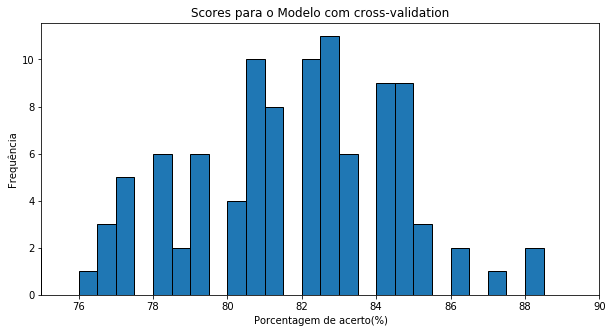

In [37]:
# Acertos para o modelo com cross-validation
faixa = arange(70, 90, 0.5)
plt.figure(figsize=(10, 5))
plt.hist(lista_hist, bins=faixa, edgecolor='black', density=False)
plt.title('Scores para o Modelo com cross-validation')
plt.ylabel('Frequência')
plt.xlabel('Porcentagem de acerto(%)')
plt.xlim(75,90)
plt.show()


In [38]:
mean=sum(lista_hist)/len(lista_hist)
mean
max(lista_hist)
print(f'Score máximo:\t{max(lista_hist):.2f}\nScore mínimo:\t{min(lista_hist):.2f}\nScore médio:\t{mean:.2f}')

Score máximo:	88.00
Score mínimo:	74.67
Score médio:	81.59


___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**